<a href="https://colab.research.google.com/github/Ajeet-18/Machine-Learning/blob/main/Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [21]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
import plotly.express as px

In [26]:
# Read data from a CSV file named "Data2.csv" into a Pandas DataFrame
df = pd.read_csv("Data2.csv")

In [10]:
df

,x,y
0,0.1,5.764952e+01
1,0.2,4.740870e+01
2,0.3,6.946902e+01
3,0.4,3.755086e+01
4,0.5,7.860685e+01
...,...,...
95,9.6,3.636073e+05
96,9.7,8.819300e+05
97,9.8,1.053557e+06
98,9.9,4.503040e+05


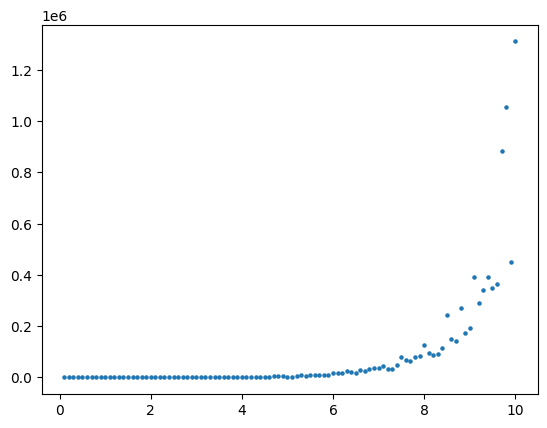

In [9]:
# Extract the 'x' and 'y' columns from the DataFrame and convert them to lists
X = [float(item) for item in list(df['x'])]
Y = [float(item) for item in list(df['y'])]

plt.scatter(X, Y, s=5)
plt.show()

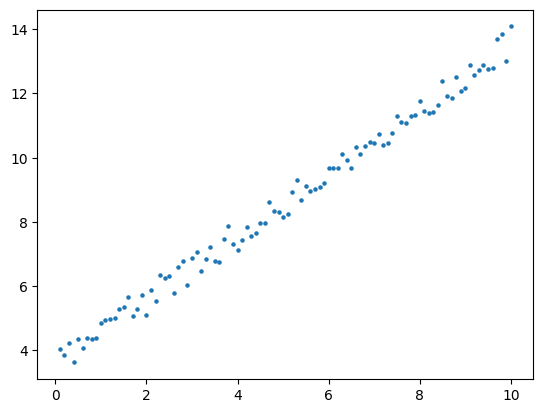

In [11]:
# Calculate the natural logarithm of each element in the 'Y' list and store them in a new list 'L'
L = []
for i in Y:
    log_value = np.log(i)  # Calculate the natural logarithm (log base e) of each 'Y' value
    L.append(log_value)

# Scatter plot of 'X' against 'L' using Matplotlib
plt.scatter(X, L, s=5)

# Display the plot
plt.show()

In [12]:
# Initialize lists to store the results of calculations
XL = []
X_square = []

# Loop through the first 100 elements of X and L
for i in range(100):
    # Calculate the product of X[i] and L[i] and append it to XL
    product = X[i] * L[i]
    XL.append(product)

    # Calculate the square of X[i] and append it to X_square
    square = X[i] ** 2
    X_square.append(square)

# Calculate the averages of XL, X, L, and X_square
average_XL = np.mean(XL)
average_X = np.mean(X)
average_L = np.mean(L)
average_X_square = np.mean(X_square)

# Display the calculated averages
print("Average of XL:", average_XL)
print("Average of X:", average_X)
print("Average of L:", average_L)
print("Average of X_square:", average_X_square)

Average of XL: 51.51608824799193
Average of X: 5.05
Average of L: 8.59575979811577
Average of X_square: 33.83500000000001


In [13]:
# Calculate the coefficients for the linear regression model
beta = (average_XL - average_X * average_L) / (average_X_square - average_X ** 2)  # It is the value of slope (m)

# Calculate the intercept (alpha) after transforming log_alpha back to the original scale
log_alpha = (average_L - beta * average_X)
alpha = np.exp(log_alpha)  # It is the value of the intercept

# Display the calculated coefficients
print("Value of slope (beta):", beta)
print("Value of intercept (alpha):", alpha)

Value of slope (beta): 0.9729974518460589
Value of intercept (alpha): 39.7306395177676


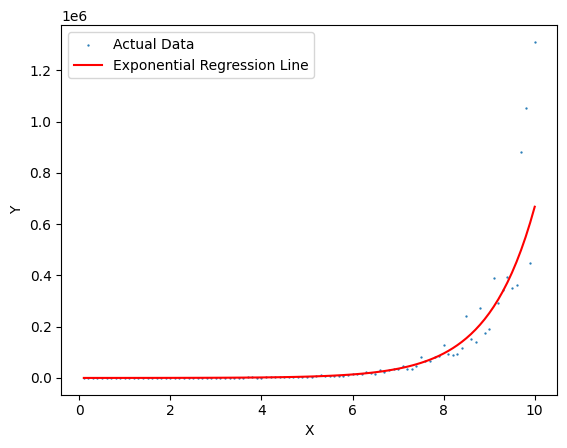

In [14]:
# Initialize a list to store the predicted Y values
predicted_Y = []

# Loop through the first 100 elements of X to predict corresponding Y values using the exponential regression model
for i in range(100):
    # Calculate the predicted Y using the exponential regression model
    prediction = alpha * np.exp(beta * X[i])
    predicted_Y.append(prediction)

# Plotting the graph; Given data set is scattered, but the predicted dataset is represented as a line.
plt.scatter(X, Y, s=0.4, label='Actual Data')  # Scatter plot for the actual data points
plt.plot(X, predicted_Y, label='Exponential Regression Line', color='red')  # Line plot for the predicted values

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()

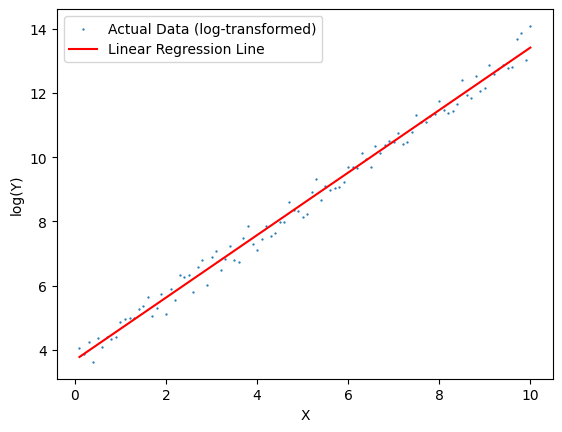

In [15]:
# Initialize a list to store the predicted Y values
predicted_Y = []

# Loop through the first 100 elements of X to predict corresponding Y values using the linear regression model
for i in range(100):
    # Calculate the predicted Y using the linear regression model after transforming back from the log scale
    y = np.log(alpha) + beta * X[i]
    predicted_Y.append(y)

# Plotting the graph; Given data set is scattered, but the predicted dataset is represented as a line.
plt.scatter(X, L, s=0.4, label='Actual Data (log-transformed)')  # Scatter plot for the actual log-transformed data points
plt.plot(X, predicted_Y, label='Linear Regression Line', color='red')  # Line plot for the predicted values on the original scale

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('log(Y)')
plt.legend()

# Display the plot
plt.show()

# Verification

In [16]:
# Using linear regression from scikit-learn to fit the model
regr = LinearRegression()

# Reshape X and L arrays to a 2D array for scikit-learn
x_array = np.array(X).reshape(-1, 1)
y_array = np.array(L).reshape(-1, 1)

# Fit the linear regression model
regr.fit(x_array, y_array)

# Display the calculated coefficients (beta) and intercept (alpha)
print("Value of slope (beta):", regr.coef_)
alpha = np.exp(regr.intercept_)  # Transforming back from log scale
print("Value of intercept (alpha):", alpha)

Value of slope (beta): [[0.97299745]]
Value of intercept (alpha): [39.73063952]


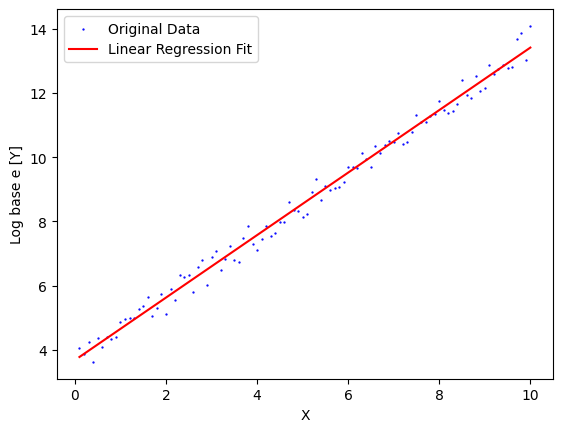

In [17]:
# Predicting the values using the trained linear regression model
y_pred_array = regr.predict(x_array)
y_pred_list = list(y_pred_array.reshape(1, -1)[0])

# Plotting the graph; Given data set is scattered, but the predicted dataset is represented as a line.
plt.scatter(X, L, s=0.4, color='blue', label='Original Data')  # Scatter plot for the original log-transformed data points
plt.plot(X, y_pred_list, color='red', label='Linear Regression Fit')  # Line plot for the predicted values

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('Log base e [Y]')
plt.legend()

# Display the plot
plt.show()

In [18]:
# Calculate error metrics between the predictions by the scikit-learn regression model and the given data
mae = mean_absolute_error(y_true=y_array, y_pred=y_pred_array)
mse = mean_squared_error(y_true=y_array, y_pred=y_pred_array)
rmse = np.sqrt(mse)  # Calculate RMSE as the square root of MSE
r_square = r2_score(y_array, y_pred_array)

# Display the calculated error metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared (r_square):", r_square)

# Comment: The code calculates various error metrics (MAE, MSE, RMSE, and R-Squared) between the predictions
# by the scikit-learn regression model and the given data. The results are then printed for analysis.

Mean Absolute Error (MAE): 0.23498835289025738
Mean Squared Error (MSE): 0.07643342704351966
Root Mean Squared Error (RMSE): 0.27646596000867746
R-Squared (r_square): 0.9904038522690993


In [19]:
# Calculate error metrics between the predictions by the custom regression model and the given data
mae = mean_absolute_error(y_true=y_array, y_pred=predicted_Y)
mse = mean_squared_error(y_true=y_array, y_pred=predicted_Y)
rmse = np.sqrt(mse)  # Calculate RMSE as the square root of MSE
r_square = r2_score(y_array, predicted_Y)

# Display the calculated error metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared (r_square):", r_square)

# Comment: The code calculates various error metrics (MAE, MSE, RMSE, and R-Squared) between the predictions
# by the custom regression model and the given data. The results are then printed for analysis.

Mean Absolute Error (MAE): 0.2349883528902577
Mean Squared Error (MSE): 0.07643342704351971
Root Mean Squared Error (RMSE): 0.27646596000867757
R-Squared (r_square): 0.9904038522690993
